In [1]:
import glob
import json

In [2]:
import matplotlib.pyplot as plt

In [4]:
base_training_result = json.load(
    open(r'C:\workspace\paper_1\resnet_base_loader_train_history.json', 'r', encoding='utf-8-sig')
)
base_training_result

{'0': {'accuracy': 0.7427,
  'precision': 0.7517211645236194,
  'recall': 0.7427,
  'f1': 0.7349303081602053,
  'roc_auc': 0.9549679277777777,
  'loss': 2.0800127527999877},
 '1': {'accuracy': 0.8862,
  'precision': 0.886774400664215,
  'recall': 0.8862,
  'f1': 0.8856705870665593,
  'roc_auc': 0.9912026888888888,
  'loss': 0.9510542587661743},
 '2': {'accuracy': 0.9114,
  'precision': 0.9116989955997957,
  'recall': 0.9114,
  'f1': 0.9110089959178382,
  'roc_auc': 0.9948487444444444,
  'loss': 0.612662721362114},
 '3': {'accuracy': 0.9319,
  'precision': 0.9321564062368574,
  'recall': 0.9319,
  'f1': 0.9316980279180851,
  'roc_auc': 0.9968362444444445,
  'loss': 0.4597997821855545},
 '4': {'accuracy': 0.9402,
  'precision': 0.9402142547224105,
  'recall': 0.9402,
  'f1': 0.9399259406808811,
  'roc_auc': 0.9974139666666666,
  'loss': 0.3828304510939121},
 '5': {'accuracy': 0.9425,
  'precision': 0.9426115288372157,
  'recall': 0.9425,
  'f1': 0.9422347840109211,
  'roc_auc': 0.9976654

In [5]:
new_training_result = json.load(
    open(r'C:\workspace\paper_1\resnet_collect_losses_train_history.json', 'r', encoding='utf-8-sig')
)
new_training_result

{'0': {'accuracy': 0.2038,
  'precision': 0.2660135965847823,
  'recall': 0.2038,
  'f1': 0.16954258463267308,
  'roc_auc': 0.6953646333333332,
  'loss': 2.284637702539706},
 '1': {'accuracy': 0.3384,
  'precision': 0.42916853967086827,
  'recall': 0.3384,
  'f1': 0.31008092494971023,
  'roc_auc': 0.8186217055555556,
  'loss': 2.2454052740773456},
 '2': {'accuracy': 0.4136,
  'precision': 0.504885798827836,
  'recall': 0.4136,
  'f1': 0.395142879479395,
  'roc_auc': 0.8598416222222222,
  'loss': 2.2133212820790447},
 '3': {'accuracy': 0.5605,
  'precision': 0.6345189078685269,
  'recall': 0.5605,
  'f1': 0.5562410431175172,
  'roc_auc': 0.9101855944444444,
  'loss': 2.130115970255087},
 '4': {'accuracy': 0.6562,
  'precision': 0.6904952260786256,
  'recall': 0.6562,
  'f1': 0.6503007487729963,
  'roc_auc': 0.9289301388888889,
  'loss': 1.955458499372196},
 '5': {'accuracy': 0.7254,
  'precision': 0.7361335654484634,
  'recall': 0.7254,
  'f1': 0.71770239892177,
  'roc_auc': 0.947478566

In [6]:
import pandas as pd

In [7]:
data_dict = {
    'method':[],
    'epoch':[],
    'accuracy':[],
    'precision':[],
    'recall':[],
    'f1':[],
    'roc_auc':[],
    'loss':[]
}

In [8]:
for epoch, results in base_training_result.items():
    data_dict['method'].append('base')
    data_dict['epoch'].append(int(epoch))
    data_dict['accuracy'].append(results['accuracy'])
    data_dict['precision'].append(results['precision'])
    data_dict['recall'].append(results['recall'])
    data_dict['f1'].append(results['f1'])
    data_dict['roc_auc'].append(results['roc_auc'])
    data_dict['loss'].append(results['loss'])

In [9]:
for epoch, results in new_training_result.items():
    data_dict['method'].append('new')
    data_dict['epoch'].append(int(epoch))
    data_dict['accuracy'].append(results['accuracy'])
    data_dict['precision'].append(results['precision'])
    data_dict['recall'].append(results['recall'])
    data_dict['f1'].append(results['f1'])
    data_dict['roc_auc'].append(results['roc_auc'])
    data_dict['loss'].append(results['loss'])

In [12]:
base_df = pd.DataFrame.from_dict(data_dict)

Text(0.5, 1.0, 'precisions')

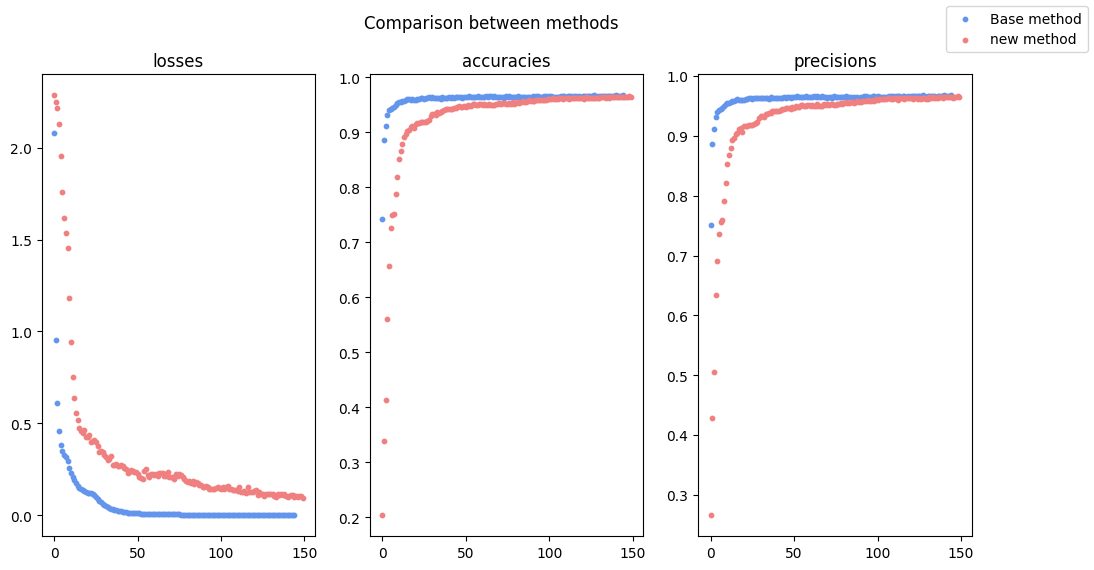

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

fig.suptitle('Comparison between methods')

colors = ['cornflowerblue', 'lightcoral']

size = 10
epochs = 150

df = base_df.loc[(base_df['method'] == 'base') & (base_df['epoch'] < epochs)]
df = df.sort_values(by='epoch').reset_index(drop=True)
axes[0].scatter(x=list(df['epoch']), y=list(df['loss']), color=colors[0], s=size)
axes[1].scatter(x=list(df['epoch']), y=list(df['accuracy']), color=colors[0], s=size)
axes[2].scatter(x=list(df['epoch']), y=list(df['precision']), color=colors[0], s=size)


df = base_df.loc[(base_df['method'] == 'new') & (base_df['epoch'] < epochs)]
df = df.sort_values(by='epoch').reset_index(drop=True)
axes[0].scatter(x=list(df['epoch']), y=list(df['loss']), color=colors[1], s=size)
axes[1].scatter(x=list(df['epoch']), y=list(df['accuracy']), color=colors[1], s=size)
axes[2].scatter(x=list(df['epoch']), y=list(df['precision']), color=colors[1], s=size)

fig.legend({'Base method': colors[0], 'new method': colors[1]})


axes[0].set_title('losses')
axes[1].set_title('accuracies')
axes[2].set_title('precisions')

# fig.

In [25]:
df

,method,epoch,accuracy,precision,recall,f1,roc_auc,loss
0,base,0,0.7427,0.751721,0.7427,0.734930,0.954968,2.080013
1,base,1,0.8862,0.886774,0.8862,0.885671,0.991203,0.951054
2,base,2,0.9114,0.911699,0.9114,0.911009,0.994849,0.612663
3,base,3,0.9319,0.932156,0.9319,0.931698,0.996836,0.459800
4,base,4,0.9402,0.940214,0.9402,0.939926,0.997414,0.382830
...,...,...,...,...,...,...,...,...
95,base,95,0.9643,0.964669,0.9643,0.964222,0.996954,0.001779
96,base,96,0.9645,0.964792,0.9645,0.964405,0.996851,0.001446
97,base,97,0.9658,0.966011,0.9658,0.965722,0.996865,0.001805
98,base,98,0.9664,0.966674,0.9664,0.966309,0.997035,0.001382
